In [1]:
!pip install dill

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dill as pickle

In [235]:
def make_plot(sbp_model_results, dbp_model_results, plot_type, opt):
    sns.set_theme()
    results = pd.DataFrame()
    for i in range(len(opt.sbp_model_names)):
        fig, ax = plt.subplots(1, 2, figsize=(15,5))
        sbp_ests = sbp_model_results[opt.sbp_model_names[i]]['raw ests']
        sbp_gts = sbp_model_results[opt.sbp_model_names[i]]['raw gts']
        sbp_data = pd.DataFrame({'SBP Estimate (mmHg)': sbp_ests, 'SBP Reference (mmHg)': sbp_gts})
        sbp_data['SBP Error (mmHg)'] = sbp_data['SBP Estimate (mmHg)'] - sbp_data['SBP Reference (mmHg)']
        sbp_data['SBP Mean of Error and Reference (mmHg)'] = (sbp_data['SBP Estimate (mmHg)'] + sbp_data['SBP Reference (mmHg)'])/2
        if plot_type == 'BA':
            sns.scatterplot(data=sbp_data, x='SBP Mean of Error and Reference (mmHg)', y='SBP Error (mmHg)', label='SBP Distribution STD = ' + str(np.round(sbp_gts.std(), 2)) + 'mmHg', ax=ax[0])
            ax[0].axhline(sbp_data['SBP Error (mmHg)'].std(), linestyle='--', color='red', label='Error STD = ' + str(np.round(sbp_data['SBP Error (mmHg)'].std(), 2)) + 'mmHg')
            ax[0].axhline(-sbp_data['SBP Error (mmHg)'].std(), linestyle='--', color='red')
            ax[0].axhline(-sbp_data['SBP Error (mmHg)'].mean(), linestyle='--', color='black', label='Bias = ' + str(np.round(sbp_data['SBP Error (mmHg)'].mean(), 2)) + 'mmHg')
            ax[0].set_title('SBP Bland Altman Plot for ' + opt.sbp_model_names[i] + ' \n' + '(dataset=' + opt.dataset_name + ', filter=' + opt.filter_name + ', alg=' + opt.alg_name + ')')
            ax[0].legend()
        elif plot_type == 'ErrRef':
            sns.scatterplot(data=sbp_data, x='SBP Reference (mmHg)', y='SBP Error (mmHg)', label='SBP Distribution STD = ' + str(np.round(sbp_gts.std(), 2)), ax=ax[0])
            ax[0].axhline(sbp_data['SBP Error (mmHg)'].std(), linestyle='--', color='red', label='Error STD = ' + str(np.round(sbp_data['SBP Error (mmHg)'].std(), 2)) + 'mmHg')
            ax[0].axhline(-sbp_data['SBP Error (mmHg)'].std(), linestyle='--', color='red')
            ax[0].axhline(-sbp_data['SBP Error (mmHg)'].mean(), linestyle='--', color='black', label='Bias = ' + str(np.round(sbp_data['SBP Error (mmHg)'].mean(), 2)) + 'mmHg')
            ax[0].set_title('SBP Error-Reference Plot for ' + opt.sbp_model_names[i] + ' \n' + '(dataset=' + opt.dataset_name + ', filter=' + opt.filter_name + ', alg=' + opt.alg_name + ')')
            ax[0].legend()
        elif plot_type == 'corr':
            sns.scatterplot(data=sbp_data, x='SBP Estimate (mmHg)', y='SBP Reference (mmHg)', ax=ax[0])
            if sbp_data['SBP Reference (mmHg)'].min() > sbp_data['SBP Estimate (mmHg)'].min():
                sbp_lb = sbp_data['SBP Estimate (mmHg)'].min()
            else:
                sbp_lb = sbp_data['SBP Reference (mmHg)'].min()
            if sbp_data['SBP Reference (mmHg)'].max() > sbp_data['SBP Estimate (mmHg)'].max():
                sbp_ub = sbp_data['SBP Estimate (mmHg)'].max()
            else:
                sbp_ub = sbp_data['SBP Reference (mmHg)'].max()
            cc = pearsonr(sbp_data['SBP Reference (mmHg)'].values, sbp_data['SBP Estimate (mmHg)'].values)[0]
            ax[0].plot(np.linspace(sbp_lb, sbp_ub, 100), np.linspace(sbp_lb, sbp_ub, 100), color='red', linestyle='--', label='r = '+str(np.round(cc, 2)))
            ax[0].set_title('SBP Correlation Plot for ' + opt.sbp_model_names[i] + ' \n' + '(dataset=' + opt.dataset_name + ', filter=' + opt.filter_name + ', alg=' + opt.alg_name + ')')
            ax[0].legend()

        dbp_ests = dbp_model_results[opt.dbp_model_names[i]]['raw ests']
        dbp_gts = dbp_model_results[opt.dbp_model_names[i]]['raw gts']
        dbp_data = pd.DataFrame({'DBP Estimate (mmHg)': dbp_ests, 'DBP Reference (mmHg)': dbp_gts})
        dbp_data['DBP Error (mmHg)'] = dbp_data['DBP Estimate (mmHg)'] - dbp_data['DBP Reference (mmHg)']
        dbp_data['DBP Mean of Error and Reference (mmHg)'] = (dbp_data['DBP Estimate (mmHg)'] + dbp_data['DBP Reference (mmHg)'])/2
        if plot_type == 'BA':
            sns.scatterplot(data=dbp_data, x='DBP Mean of Error and Reference (mmHg)', y='DBP Error (mmHg)', label='DBP Distribution STD = ' + str(np.round(dbp_gts.std(), 2)) + 'mmHg', ax=ax[1])
            ax[1].axhline(dbp_data['DBP Error (mmHg)'].std(), linestyle='--', color='red', label='Error STD = ' + str(np.round(dbp_data['DBP Error (mmHg)'].std(), 2)) + 'mmHg')
            ax[1].axhline(-dbp_data['DBP Error (mmHg)'].std(), linestyle='--', color='red')
            ax[1].axhline(-dbp_data['DBP Error (mmHg)'].mean(), linestyle='--', color='black', label='Bias = ' + str(np.round(dbp_data['DBP Error (mmHg)'].mean(), 2)) + 'mmHg')
            ax[1].set_title('DBP Bland Altman Plot for ' + opt.sbp_model_names[i] + ' \n' + '(dataset=' + opt.dataset_name + ', filter=' + opt.filter_name + ', alg=' + opt.alg_name + ')')
            ax[1].legend()
        elif plot_type == 'ErrRef':
            sns.scatterplot(data=dbp_data, x='DBP Reference (mmHg)', y='DBP Error (mmHg)', label='DBP Distribution STD = ' + str(np.round(dbp_gts.std(), 2)), ax=ax[1])
            ax[1].axhline(dbp_data['DBP Error (mmHg)'].std(), linestyle='--', color='red', label='Error STD = ' + str(np.round(dbp_data['DBP Error (mmHg)'].std(), 2)) + 'mmHg')
            ax[1].axhline(-dbp_data['DBP Error (mmHg)'].std(), linestyle='--', color='red')
            ax[1].axhline(-dbp_data['DBP Error (mmHg)'].mean(), linestyle='--', color='black', label='Bias = ' + str(np.round(dbp_data['DBP Error (mmHg)'].mean(), 2)) + 'mmHg')
            ax[1].set_title('DBP Error-Reference Plot for ' + opt.sbp_model_names[i] + ' \n' + '(dataset=' + opt.dataset_name + ', filter=' + opt.filter_name + ', alg=' + opt.alg_name + ')')
            ax[1].legend()
        elif plot_type == 'corr':
            sns.scatterplot(data=dbp_data, x='DBP Estimate (mmHg)', y='DBP Reference (mmHg)', ax=ax[1])
            if dbp_data['DBP Reference (mmHg)'].min() > dbp_data['DBP Estimate (mmHg)'].min():
                dbp_lb = dbp_data['DBP Estimate (mmHg)'].min()
            else:
                dbp_lb = dbp_data['DBP Reference (mmHg)'].min()
            if dbp_data['DBP Reference (mmHg)'].max() > dbp_data['DBP Estimate (mmHg)'].max():
                dbp_ub = dbp_data['DBP Estimate (mmHg)'].max()
            else:
                dbp_ub = dbp_data['DBP Reference (mmHg)'].max()
            cc = pearsonr(dbp_data['DBP Reference (mmHg)'].values, dbp_data['DBP Estimate (mmHg)'].values)[0]
            ax[1].plot(np.linspace(dbp_lb, dbp_ub, 100), np.linspace(dbp_lb, dbp_ub, 100), color='red', linestyle='--', label='r = '+str(np.round(cc, 2)))
            ax[1].set_title('DBP Correlation Plot for ' + opt.sbp_model_names[i] + ' \n' + '(dataset=' + opt.dataset_name + ', filter=' + opt.filter_name + ', alg=' + opt.alg_name + ')')
            ax[1].legend() 
            
        d = pd.DataFrame([opt.dataset_name, opt.filter_name, opt.alg_name,
                          str(np.round(sbp_data['SBP Error (mmHg)'].std(), 2)), 
                          str(np.round(dbp_data['DBP Error (mmHg)'].std(), 2)), 
                          str(np.round(sbp_data['SBP Error (mmHg)'].mean(), 2)),
                          str(np.round(dbp_data['DBP Error (mmHg)'].mean(), 2)),
                          str(np.round(sbp_gts.std(), 2)),
                          str(np.round(dbp_gts.std(), 2)),
                          str(np.round(sbp_gts.std()/sbp_data['SBP Error (mmHg)'].std(), 2)),
                          str(np.round(dbp_gts.std()/dbp_data['DBP Error (mmHg)'].std(), 2))]).T
        d.columns = ['Dataset', 'Filter', 'Alg', 'SBP Error STD (mmHg)', 'DBP Error STD (mmHg)',
                     'SBP Error Bias (mmHg)', 'DBP Error Bias (mmHg)',
                     'SBP Distribution STD (mmHg)', 'DBP Distribution STD (mmHg)',
                     'SBP ED', 'DBP ED']

        return pd.concat([results, d])

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.1.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator Ad

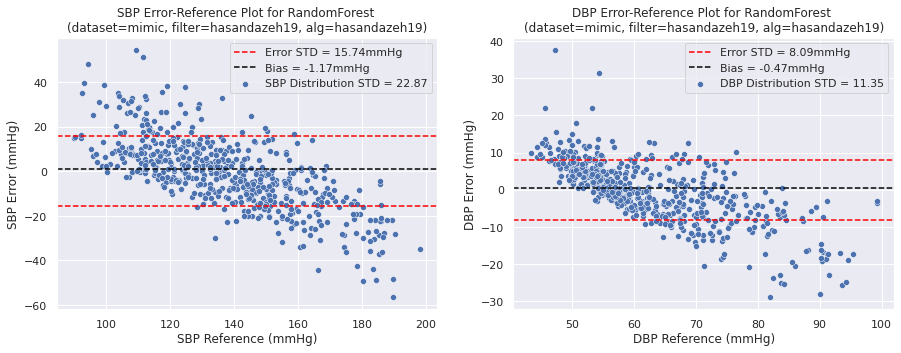

In [238]:
dataset_name = 'mimic'
filter_name = 'hasandazeh19'
alg_name = 'hasandazeh19'

results_path = './results/training/' + dataset_name + '_' + filter_name + '_' + alg_name + '.pickle'

with open(results_path, 'rb') as f:
    data = pickle.load(f)
    
sbp_model_results = data['sbp']
dbp_model_results = data['dbp']
opt = data['opt']
opt.dataset_name = dataset_name
opt.filter_name = filter_name
opt.alg_name = alg_name

df = make_plot(sbp_model_results, dbp_model_results, 'ErrRef', opt)

In [239]:
df

,Dataset,Filter,Alg,SBP Error STD (mmHg),DBP Error STD (mmHg),SBP Error Bias (mmHg),DBP Error Bias (mmHg),SBP Distribution STD (mmHg),DBP Distribution STD (mmHg),SBP ED,DBP ED
0,mimic,hasandazeh19,hasandazeh19,15.74,8.09,-1.17,-0.47,22.87,11.35,1.45,1.4
